# List 12

## Info

- **Driver_ID**: Id do motorista
- **Distance_Feature**: distância média dirigida por dia
- **Speeding_Feature**: média percentual do tempo que um motorista estava 5mph acima do limite de velocidade.

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.cm as cm 
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples

from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import euclidean

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.cluster import AgglomerativeClustering

from sklearn import datasets, preprocessing
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [2]:
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 6)

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv('k-means-clust-data-1024.csv', delimiter='\t')

In [4]:
xdf = df[['Distance_Feature', 'Speeding_Feature']]

In [5]:
xdf.head()


,Distance_Feature,Speeding_Feature
0,71.24,28.0
1,52.53,25.0
2,64.54,27.0
3,55.69,22.0
4,54.58,25.0


## Clusterização hierárquica (HC) usando os seguintes métodos e mostrando os dendrogramas para:
- Single
- Complete
- Average

### Single

In [6]:
hc_single = linkage(xdf.values, method='single')

In [7]:
pd_single = pd.DataFrame(hc_single, columns = ['idx1', 'idx2', 'dist', 'sample_count'])

In [8]:
pd_single.head()

,idx1,idx2,dist,sample_count
0,118.0,212.0,0.0,2.0
1,989.0,3163.0,0.0,2.0
2,1055.0,1870.0,0.0,2.0
3,1190.0,1913.0,0.0,2.0
4,111.0,1650.0,0.0,2.0


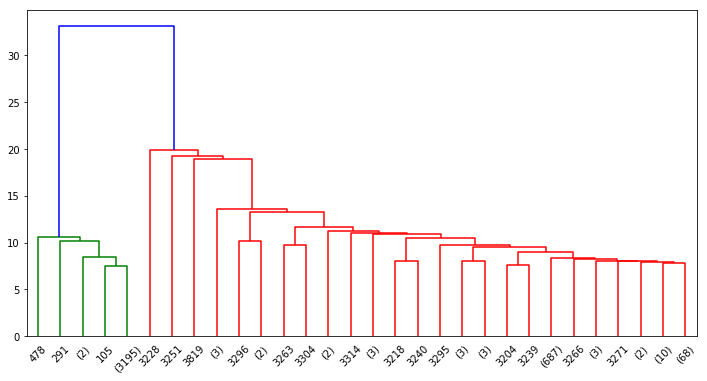

In [9]:
dendrogram(hc_single, truncate_mode='lastp')
plt.show()

### Complete

In [10]:
hc_complete = linkage(xdf.values, method="complete")

In [11]:
df_complete = pd.DataFrame(hc_complete, columns = ['idx1', 'idx2', 'dist', 'sample_count'])
df_complete.head()

,idx1,idx2,dist,sample_count
0,118.0,212.0,0.0,2.0
1,58.0,897.0,0.0,2.0
2,111.0,1650.0,0.0,2.0
3,1128.0,3038.0,0.0,2.0
4,887.0,2371.0,0.0,2.0


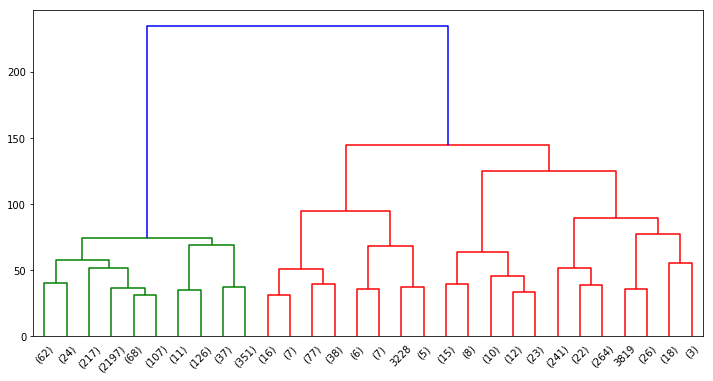

In [12]:
dendrogram(hc_complete, truncate_mode='lastp')
plt.show()

### Average

In [13]:
hc_average = linkage(xdf.values, method="average")

In [14]:
df_average = pd.DataFrame(hc_complete, columns = ['idx1', 'idx2', 'dist', 'sample_count'])
df_average.head()

,idx1,idx2,dist,sample_count
0,118.0,212.0,0.0,2.0
1,58.0,897.0,0.0,2.0
2,111.0,1650.0,0.0,2.0
3,1128.0,3038.0,0.0,2.0
4,887.0,2371.0,0.0,2.0


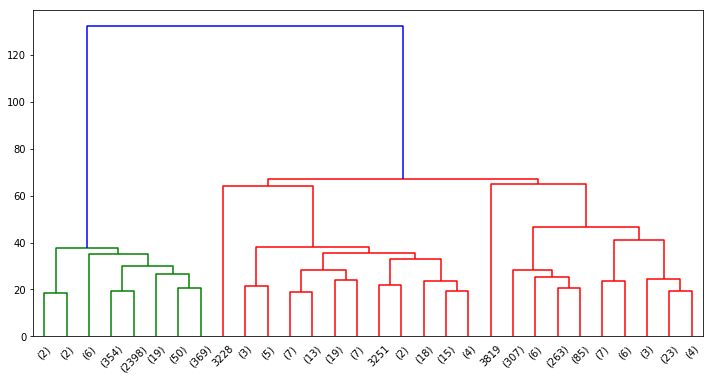

In [15]:
dendrogram(hc_average, truncate_mode='lastp')
plt.show()

## Escolher uma linha de corte e mostrar os clusters no gráfico

- linha de corte(50) estão com a cor azul (ou seja, todo mundo que é maior ou igual a 50), e o restante estão com coloração diferente.

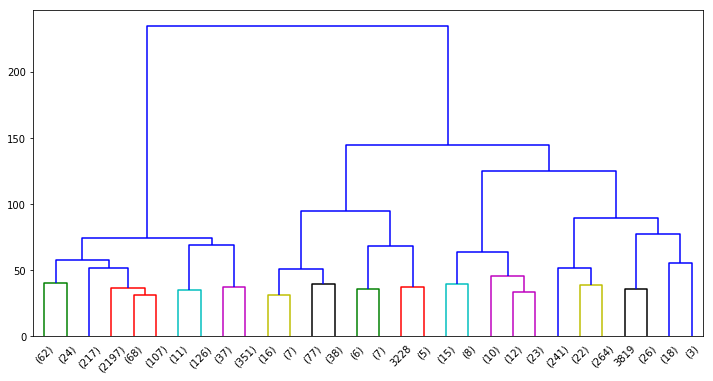

In [16]:
dendrogram(hc_complete, truncate_mode='lastp', color_threshold=50)
plt.show()

In [87]:
np.unique(cut_tree(hc_complete, n_clusters=4), return_counts=True)

(array([0, 1, 2, 3]), array([3200,   68,  157,  575]))

## Clusterização DBSCAN com diferentes valores de eps e minPoints

In [61]:
X = xdf.values

In [62]:
X

array([[ 71.24,  28.  ],
       [ 52.53,  25.  ],
       [ 64.54,  27.  ],
       ...,
       [170.91,  12.  ],
       [176.14,   5.  ],
       [168.03,   9.  ]])

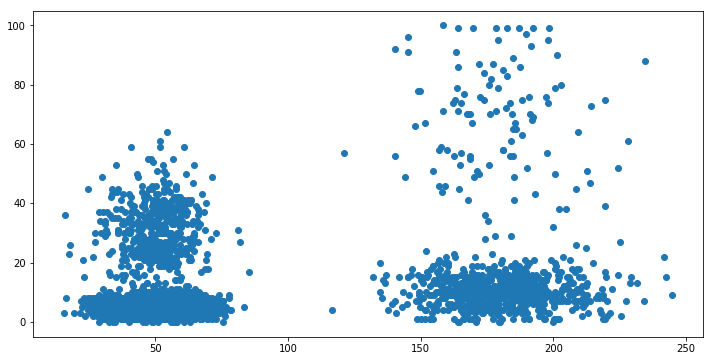

In [63]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [69]:
db = DBSCAN(eps=5, min_samples=10, metric='euclidean')

In [72]:
y_db = db.fit_predict(X)

In [74]:
y_db

array([0, 0, 0, ..., 1, 1, 1])

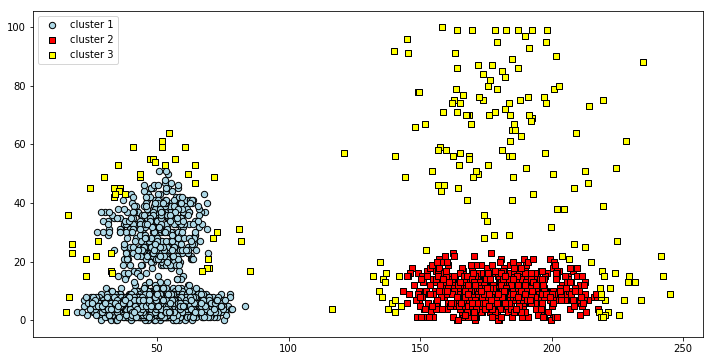

In [89]:
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black', 
            label='cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1],
            c='red', marker='s', s=40,
            edgecolor='black', 
            label='cluster 2')
plt.scatter(X[y_db == -1, 0], X[y_db == -1, 1],
            c='yellow', marker='s', s=40,
            edgecolor='black', 
            label='cluster 3')
plt.legend()
plt.show()


In [90]:
db = DBSCAN(eps=10, min_samples=15, metric='euclidean')

In [91]:
y_db = db.fit_predict(X)
y_db

array([0, 0, 0, ..., 2, 2, 2])

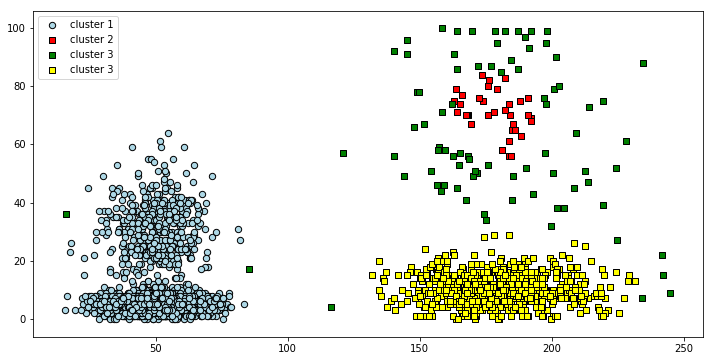

In [94]:
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black', 
            label='cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1],
            c='red', marker='s', s=40,
            edgecolor='black', 
            label='cluster 2')
plt.scatter(X[y_db == -1, 0], X[y_db == -1, 1],
            c='green', marker='s', s=40,
            edgecolor='black', 
            label='cluster 3')
plt.scatter(X[y_db == 2, 0], X[y_db == 2, 1],
            c='yellow', marker='s', s=40,
            edgecolor='black', 
            label='cluster 3')
plt.legend()
plt.show()

## Clusterização com K-Means e Clusterização Aglomerativa

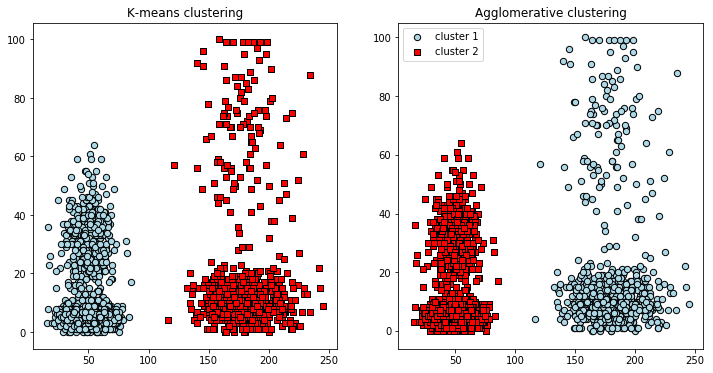

In [24]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1],
            edgecolor='black',
            c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1],
            edgecolor='black',
            c='red', marker='s', s=40, label='cluster 2')
ax1.set_title('K-means clustering')

# ------------------

ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1], c='lightblue',
            edgecolor='black',
            marker='o', s=40, label='cluster 1')
ax2.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1], c='red',
            edgecolor='black',
            marker='s', s=40, label='cluster 2')
ax2.set_title('Agglomerative clustering')

plt.legend()
plt.show()


## Quais as diferenças entre feature selection e feature extraction?

### - Feature Selection: 
_Essa técnica é usada para selecionar e remover recursos desnecessários do dataset, isso é feito antes do modelo ser executado._

### - Feature Extraction: 
_Essa técnica é uma transformação feita nos dados com o proposito de melhorar a precisão do algoritmo, por exemplo, uma data com dia/mês/ano em muitos casos é melhor para o algoritmo se isso fosse transformado apenas no dia, mês ou no ano._

## Exemplos de técnicas usadas para feature selection.


#### Isso pode ser feito por varias técnicas, como: 
- Regressão Linear
- Árvores de Decisão
- Cálculo de pesos de importância (L1, L2)

## Dê exemplos de técnicas usadas para feature extraction.


#### Essa técnica está relacionada a redução de dimensionalidade. Técnicas gerais de redução de dimensionalidade são usadas, como: 
- Redução de dimensionalidade multifatorial
- Redução de dimensionalidade não linear
- PCA do kernel

## Redução de Dimensionalidade

_Utilizando o dataset IRIS_

In [25]:
X, y = datasets.load_iris(return_X_y=True)

In [26]:
X[1:10]

array([[4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

### PCA

#### Redução de dimensionalidade para 2 dimensões

In [27]:
pca = PCA(n_components = 2)
df_pca = pd.DataFrame(pca.fit_transform(X))
df_pca.head()

,0,1
0,-2.684207,0.326607
1,-2.715391,-0.169557
2,-2.889820,-0.137346
3,-2.746437,-0.311124
4,-2.728593,0.333925


#### Visualizando pontos onde cada classe tem uma cor diferente

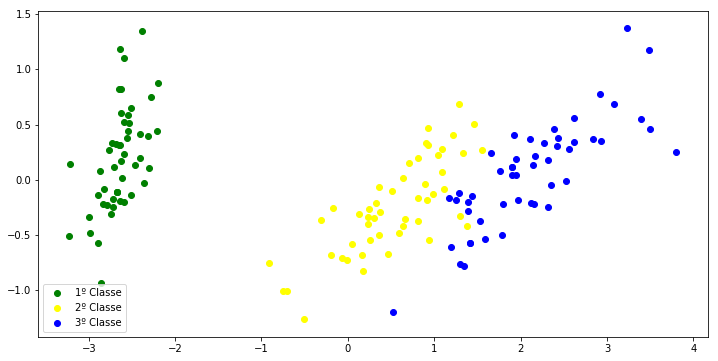

In [28]:
plt.scatter(df_pca[y == 0][0], df_pca[y == 0][1], label='1º Classe', c='green')
plt.scatter(df_pca[y == 1][0], df_pca[y == 1][1], label='2º Classe', c='yellow')
plt.scatter(df_pca[y == 2][0], df_pca[y == 2][1], label='3º Classe', c='blue')

plt.legend()
plt.show()

### LDA

#### Redução de dimensionalidade para 2 dimensões

In [29]:
lda = LDA(n_components = 2)
df_lda = pd.DataFrame(lda.fit_transform(X, y))
df_lda.head()

,0,1
0,-8.084953,0.328454
1,-7.147163,-0.755473
2,-7.511378,-0.238078
3,-6.837676,-0.642885
4,-8.157814,0.540639


#### Visualizando pontos onde cada classe tem uma cor diferente

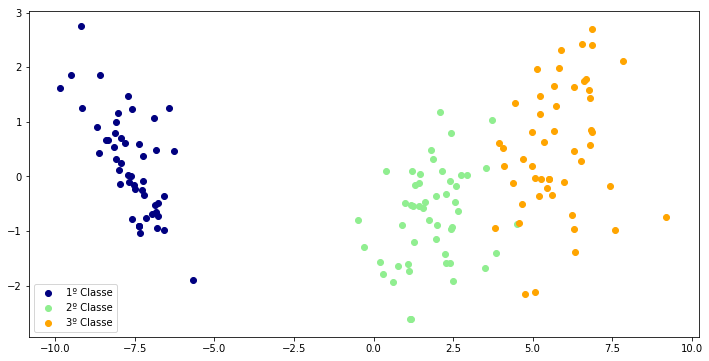

In [36]:
plt.scatter(df_lda[y == 0][0], df_lda[y == 0][1], label='1º Classe', c='navy')
plt.scatter(df_lda[y == 1][0], df_lda[y == 1][1], label='2º Classe', c='lightgreen')
plt.scatter(df_lda[y == 2][0], df_lda[y == 2][1], label='3º Classe', c='orange')

plt.legend()
plt.show()